In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
fs = 1 / 30

In [92]:
datos_fuzzy = pd.read_excel(r'/home/tomas/Desktop/Imagenes_fuzzy/ocho/resultado.xlsx')
datos_pid = pd.read_excel(r'/home/tomas/Desktop/Imagenes_pid/tercera/resultado.xlsx')

In [93]:
datos_pid

,Unnamed: 0,pos_x,pos_y,angle_x,angle_y
0,0,-0.039910,0.076777,30.291710,-20.000000
1,1,-0.039910,0.076777,2.155141,-4.145972
2,2,-0.039524,0.076422,1.862468,-3.876185
3,3,-0.039910,0.076777,2.426992,-4.396564
4,4,-0.041452,0.077133,3.325835,-4.415758
...,...,...,...,...,...
518,518,-0.063046,-0.019905,3.404499,2.327844
519,519,-0.064203,-0.020261,4.282519,1.344668
520,520,-0.064589,-0.022038,3.759640,2.443009
521,521,-0.066131,-0.023104,4.658483,1.999408


In [94]:
longitud = len(datos_fuzzy['pos_y'])
if longitud > 300:
    longitud = 300
tiempo = fs * np.linspace(0, longitud-1, longitud)
linea_cero = 0 * tiempo

e0_fuzzy = (datos_fuzzy['pos_y'])[0]
e0_pid = (datos_pid['pos_y'])[0]

#Averiguo la media en su valor final
media_fuzzy = np.average((datos_fuzzy['pos_y'])[45:longitud])
media_pid = np.average((datos_pid['pos_y'])[45:longitud])

#Tiempo de establecimiento al 5% del valor medio
for i in range(longitud):
    if((e0_fuzzy - (datos_fuzzy['pos_y'])[i]) >= ((e0_fuzzy - media_fuzzy) * .8)):
        te_fuzzy = i
        break

for i in range(longitud):
    if((e0_pid - (datos_pid['pos_y'])[i]) >= ((e0_pid - media_pid) * .8)):
        te_pid = i
        break        

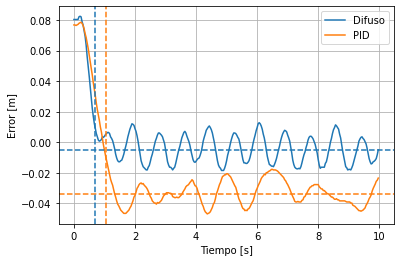

In [106]:
fig = plt.figure()

plt.plot(tiempo, (datos_fuzzy['pos_y'])[0:longitud], color='tab:blue', label='Difuso')
plt.plot(tiempo, (datos_pid['pos_y'])[0:longitud], color='tab:orange', label='PID')
#plt.plot(tiempo, media_fuzzy * np.ones(longitud), color='tab:blue', linestyle='--')
#plt.plot(tiempo, media_pid * np.ones(longitud), color='tab:orange', lite_fuzzytyle='--')
plt.axhline(y = media_fuzzy, color='tab:blue', linestyle='--')
plt.axhline(y = media_pid, color='tab:orange', linestyle='--')

plt.axvline(x = te_fuzzy * fs, color='tab:blue', linestyle='--')
plt.axvline(x = te_pid * fs, color='tab:orange', linestyle='--')

plt.xlabel('Tiempo [s]')
plt.ylabel('Error [m]')

plt.grid(True)
plt.legend()
plt.show()
fig.savefig('error.png', dpi=200)

In [113]:
print("te fuzzy: {}s".format(te_fuzzy * fs))
print("te pid: {}s".format(te_pid * fs))

print("Error fuzzy: {}%".format(100 * abs(media_fuzzy/(e0_fuzzy))))
print("Error pid: {}%".format(100 * abs(media_pid/(e0_pid))))

te fuzzy: 0.7s
te pid: 1.0666666666666667s
Error fuzzy: 5.960437272254034%
Error pid: 43.83623819898331%


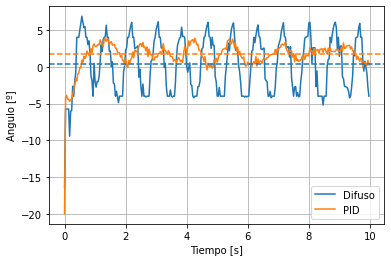

In [104]:
#Ahora analicemos el angulo aplicado
ang_media_fuzzy = np.average((datos_fuzzy['angle_y'])[45:longitud])
ang_media_pid = np.average((datos_pid['angle_y'])[45:longitud])

fig = plt.figure()

plt.plot(tiempo, (datos_fuzzy['angle_y'])[0:longitud], color='tab:blue', label='Difuso')
plt.plot(tiempo, (datos_pid['angle_y'])[0:longitud], color='tab:orange', label='PID')
#plt.plot(tiempo, media_fuzzy * np.ones(longitud), color='tab:blue', linestyle='--')
#plt.plot(tiempo, media_pid * np.ones(longitud), color='tab:orange', lite_fuzzytyle='--')
plt.axhline(y = ang_media_fuzzy, color='tab:blue', linestyle='--')
plt.axhline(y = ang_media_pid, color='tab:orange', linestyle='--')

#plt.axvline(x = te_fuzzy * fs, color='tab:blue', linestyle='--')
#plt.axvline(x = te_pid * fs, color='tab:orange', linestyle='--')

plt.xlabel('Tiempo [s]')
plt.ylabel('Angulo [º]')

plt.grid(True)
plt.legend()
plt.show()
fig.savefig('angulo.png', dpi=200)